# A first look at pandas
###### **12.01.2022**

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
df = pd.DataFrame(
    {
        "user": [1, 2, 3],
        "age": [24, 54, 17],
        "sex": ["F", "F", "M"],
        "occupation": ["technician", "musician", "student"],
    }
)

In [3]:
df

,user,age,sex,occupation
0,1,24,F,technician
1,2,54,F,musician
2,3,17,M,student


In [4]:
df.reset_index(inplace=True)
df

,index,user,age,sex,occupation
0,0,1,24,F,technician
1,1,2,54,F,musician
2,2,3,17,M,student


In [5]:
#Number of rows
df.shape[0]
#Number of columns
df.shape[1]
# displaying the labels of all the columns
df.columns
# displaying the data types of each column
df.dtypes

index          int64
user           int64
age            int64
sex           object
occupation    object
dtype: object

We have created a DataFrame that has 3 rows and 3 columns and stores the numbers from 0 to 8. We gave the columns the labels a, b and c

In [6]:
df = pd.DataFrame(np.arange(9).reshape(3, 3), columns=["a", "b", "c"])
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [7]:
# Drop the first row as follows:
df.drop(0, axis=0)
# To drop columns we just specify the label instead of the index and tell pandas we are referring to the second axis now:
df.drop(["b", "c"], axis=1)

,a
0,0
1,3
2,6


##### **Arithmetic operations** 
We can take the first column of our DataFrame and add to it the second by just using the plus operator

In [8]:
df["a"] + df["b"]
#  We could have also used the add() method provided by pandas. It gives us the same result:
df["a"].add(df["b"])

0     1
1     7
2    13
dtype: int32

In [9]:
df
df.loc[0:1, :]

,a,b,c
0,0,1,2
1,3,4,5


In [10]:
df.add(df.loc[0:1, :])

,a,b,c
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,NaN,NaN,NaN


By default, when we have indices or column labels that do not overlap between the two DataFrames that we are performing an arithmetic operation with, pandas will fill in these entries with NaN. We can also specify our own value using the fill_value parameter.

In [11]:
df.add(df.loc[0:1, :], fill_value=0)

,a,b,c
0,0.0,2.0,4.0
1,6.0,8.0,10.0
2,6.0,7.0,8.0


Below we consider the two main cases:

* the DataFrames have the same columns and we want to stack them one on top of the other
* the DataFrames have the same rows and we want to glue them one next to the other
Let’s test out this example of DataFrames with the same columns

In [12]:
df1 = pd.DataFrame([["Mark", 50], ["Kate", 46]], columns=["name", "age"])
df2 = pd.DataFrame([["Jon", 3], ["David", 4]], columns=["name", "age"])
pd.concat([df1, df2])

,name,age
0,Mark,50
1,Kate,46
0,Jon,3
1,David,4


Combining the two DataFrames didn’t reset the index column. This might lead to some problems later on. For example, using the df.loc[0] command to access column 0 will spit out Mark and Jon. One way to handle this issue is by reindexing that DataFrame, using the reset_index() function. In the example above, the DataFrames were concatenated along the rows, as they had identical columns. Let’s now see how we can combine two different DataFrames along the columns.

In [13]:
df3 = pd.DataFrame(["writer", "journalist"], columns=["occupation"])
pd.concat([df1, df3], axis=1)

,name,age,occupation
0,Mark,50,writer
1,Kate,46,journalist


### **Indexing, selecting and filtering in pandas**

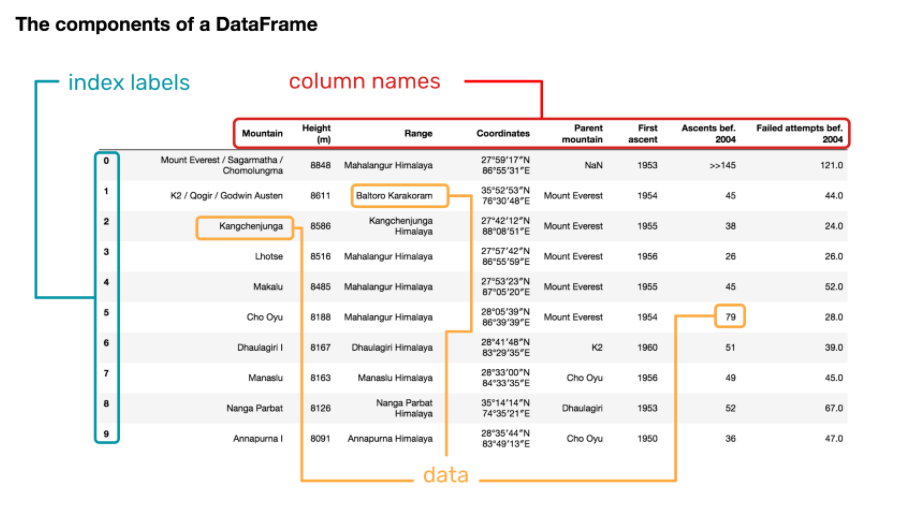

In [14]:
Image(filename="Components.png")

In [15]:
# We will work on a subset of the columns
columns = [
    "Mountain",
    "Height (m)",
    "Range",
    "Coordinates",
    "Parent mountain",
    "First ascent",
    "Ascents bef. 2004",
    "Failed attempts bef. 2004",
]

# Load the DataFrame, we will work on the first 10 rows (ten highest mountains)
df = pd.read_csv("c1_mountains.csv", nrows=10, usecols=columns)
df

,Mountain,Height (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
0,Mount Everest / Sagarmatha / Chomolungma,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121
1,K2 / Qogir / Godwin Austen,8611,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44
2,Kangchenjunga,8586,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24
3,Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26
4,Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52
5,Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28
6,Dhaulagiri I,8167,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39
7,Manaslu,8163,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45
8,Nanga Parbat,8126,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67
9,Annapurna I,8091,Annapurna Himalaya,28°35′44″N 83°49′13″E﻿,Cho Oyu,1950,36,47


For the purposes of our exercise let’s change the row index to be non-numerical, for example the Mountain column giving the names of the mountains



In [16]:
df.set_index("Mountain", inplace=True)
df

,Height (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,,
Mount Everest / Sagarmatha / Chomolungma,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121
K2 / Qogir / Godwin Austen,8611,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44
Kangchenjunga,8586,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26
Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52
Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28
Dhaulagiri I,8167,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39
Manaslu,8163,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45
Nanga Parbat,8126,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67


We can now see that the numerical indexing from 0 has been replaced by the column giving the mountain names. Given a DataFrame we can always check its index labels and column names using the attributes index and columns respectively

In [17]:
df.index
#df.columns

Index(['Mount Everest / Sagarmatha / Chomolungma',
       'K2 / Qogir / Godwin Austen', 'Kangchenjunga', 'Lhotse', 'Makalu',
       'Cho Oyu', 'Dhaulagiri I', 'Manaslu', 'Nanga Parbat', 'Annapurna I'],
      dtype='object', name='Mountain')

### **The attribute operator . to select columns**
The attribute operator allows us to select a single column at a time. This is because in the implementation of the DataFrame object the columns are automatically declared as attributes. 

In [18]:
df.Range

Mountain
Mount Everest / Sagarmatha / Chomolungma       Mahalangur Himalaya
K2 / Qogir / Godwin Austen                       Baltoro Karakoram
Kangchenjunga                               Kangchenjunga Himalaya
Lhotse                                         Mahalangur Himalaya
Makalu                                         Mahalangur Himalaya
Cho Oyu                                        Mahalangur Himalaya
Dhaulagiri I                                   Dhaulagiri Himalaya
Manaslu                                           Manaslu Himalaya
Nanga Parbat                                 Nanga Parbat Himalaya
Annapurna I                                     Annapurna Himalaya
Name: Range, dtype: object

Now if we tried to use the attribute operator with the column 'Height (m)' we will obtain an error since Python’s language syntax cannot allow for certain characters such as white spaces direct attribute reference. We can get around this using the getattr function as follows

In [19]:
getattr(df, "Height (m)")

Mountain
Mount Everest / Sagarmatha / Chomolungma    8848
K2 / Qogir / Godwin Austen                  8611
Kangchenjunga                               8586
Lhotse                                      8516
Makalu                                      8485
Cho Oyu                                     8188
Dhaulagiri I                                8167
Manaslu                                     8163
Nanga Parbat                                8126
Annapurna I                                 8091
Name: Height (m), dtype: int64

Another way that we can select a specific column is by passing its name to the index operator. Note that the name has to be passed inside quotation marks. The index operator also allows us to select multiple columns at a time. 



In [20]:
df["Height (m)"]
df[["Height (m)", "Range", "Coordinates"]]

,Height (m),Range,Coordinates
Mountain,,,
Mount Everest / Sagarmatha / Chomolungma,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿
K2 / Qogir / Godwin Austen,8611,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿
Kangchenjunga,8586,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿
Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿
Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿
Dhaulagiri I,8167,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿
Manaslu,8163,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿
Nanga Parbat,8126,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿


We can also use the index operator with Python’s slice notation. Recall the general syntax for the slice notation for an iterable object a: a[start:stop:step]

In [21]:
df[2:8]

,Height (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,,
Kangchenjunga,8586,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26
Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52
Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28
Dhaulagiri I,8167,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39
Manaslu,8163,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45


We can also use the slicing notation with the index labels as follows

In [22]:
df["Lhotse":"Manaslu"]

,Height (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,,
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26
Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52
Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28
Dhaulagiri I,8167,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960,51,39
Manaslu,8163,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49,45


Note that when used with the index labels as opposed to the positions, the slicing notation becomes inclusive of both the start and end value. We have seen how to select multiple rows or multiple columns individually, but what if we would like to simultaneously select a subset of the rows and a subset of the columns. This is what the next two operators help us achieve.

### **The iloc operator to select rows and columns by position**
The iloc operator allows us to slice both rows and columns using their position. The general syntax is as follows_ df.iloc[rows, columns]

In [23]:
df.iloc[:, 2:6]

,Coordinates,Parent mountain,First ascent,Ascents bef. 2004
Mountain,,,,
Mount Everest / Sagarmatha / Chomolungma,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145
K2 / Qogir / Godwin Austen,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45
Kangchenjunga,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38
Lhotse,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26
Makalu,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45
Cho Oyu,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79
Dhaulagiri I,28°41′48″N 83°29′35″E﻿,K2,1960,51
Manaslu,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956,49
Nanga Parbat,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52


Here we are using the slicing notation ::2 for the rows which selects every second row from the first to and up to the last. We are then using the slicing notation 2: for the columns which selects every column from position 2 to the last column of the DataFrame.

In [24]:
df.iloc[::2, 2:]

,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,
Mount Everest / Sagarmatha / Chomolungma,27°59′17″N 86°55′31″E﻿,NaN,1953,>>145,121
Kangchenjunga,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24
Makalu,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52
Dhaulagiri I,28°41′48″N 83°29′35″E﻿,K2,1960,51,39
Nanga Parbat,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953,52,67


### **The loc operator to select rows and columns by label**
The loc operator is similar to the iloc one except that instead of referencing rows and columns using their position in the DataFrame we use the index labels and column names respectively. The general syntax is exactly the same: df.loc[rows, columns]

In [25]:
df.loc[:, "Height (m)":"First ascent"]

,Height (m),Range,Coordinates,Parent mountain,First ascent
Mountain,,,,,
Mount Everest / Sagarmatha / Chomolungma,8848,Mahalangur Himalaya,27°59′17″N 86°55′31″E﻿,NaN,1953
K2 / Qogir / Godwin Austen,8611,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954
Kangchenjunga,8586,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956
Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955
Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954
Dhaulagiri I,8167,Dhaulagiri Himalaya,28°41′48″N 83°29′35″E﻿,K2,1960
Manaslu,8163,Manaslu Himalaya,28°33′00″N 84°33′35″E﻿,Cho Oyu,1956
Nanga Parbat,8126,Nanga Parbat Himalaya,35°14′14″N 74°35′21″E﻿,Dhaulagiri,1953


In the slice notation we can also include a step size just as before. So if we wanted to select every other column from this previous selection we would write



In [26]:
df.loc[:, "Height (m)":"First ascent":2]

,Height (m),Coordinates,First ascent
Mountain,,,
Mount Everest / Sagarmatha / Chomolungma,8848,27°59′17″N 86°55′31″E﻿,1953
K2 / Qogir / Godwin Austen,8611,35°52′53″N 76°30′48″E﻿,1954
Kangchenjunga,8586,27°42′12″N 88°08′51″E﻿,1955
Lhotse,8516,27°57′42″N 86°55′59″E﻿,1956
Makalu,8485,27°53′23″N 87°05′20″E﻿,1955
Cho Oyu,8188,28°05′39″N 86°39′39″E﻿,1954
Dhaulagiri I,8167,28°41′48″N 83°29′35″E﻿,1960
Manaslu,8163,28°33′00″N 84°33′35″E﻿,1956
Nanga Parbat,8126,35°14′14″N 74°35′21″E﻿,1953


### **Bolean selection of rows using the [] operator**
We can also select rows and columns based on a boolean condition. Boolean conditions can be used with either the [] operator or the .loc operator. Below we consider the possible ways to do this. This applies when we want to select rows based on a boolean condition on one or more of the columns. For example, we might be interested in all mountains that have Mount Everest as their parent mountain

In [27]:
df["Parent mountain"] == "Mount Everest"
df[df["Parent mountain"] == "Mount Everest"]

,Height (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,,
K2 / Qogir / Godwin Austen,8611,Baltoro Karakoram,35°52′53″N 76°30′48″E﻿,Mount Everest,1954,45,44
Kangchenjunga,8586,Kangchenjunga Himalaya,27°42′12″N 88°08′51″E﻿,Mount Everest,1955,38,24
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26
Makalu,8485,Mahalangur Himalaya,27°53′23″N 87°05′20″E﻿,Mount Everest,1955,45,52
Cho Oyu,8188,Mahalangur Himalaya,28°05′39″N 86°39′39″E﻿,Mount Everest,1954,79,28


In [28]:
df.loc[(df["Parent mountain"] == "Mount Everest") & (df["First ascent"] > 1955), :]

,Height (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,,
Lhotse,8516,Mahalangur Himalaya,27°57′42″N 86°55′59″E﻿,Mount Everest,1956,26,26


In [29]:
df.loc[
    (df["Parent mountain"] == "Mount Everest") & (df["First ascent"] > 1955),
    "Height (m)":"Range",
]

,Height (m),Range
Mountain,,
Lhotse,8516,Mahalangur Himalaya


For example in our selection above suppose we now only want the first two columns to be returned. We can achieve this with the second aline. In fact, we can even include a boolean selection for the columns as well. Here is an example

In [30]:
col_criteria = [True, False, False, False, True, True, False]
df.loc[df["Height (m)"] > 8300, col_criteria]

,Height (m),First ascent,Ascents bef. 2004
Mountain,,,
Mount Everest / Sagarmatha / Chomolungma,8848,1953,>>145
K2 / Qogir / Godwin Austen,8611,1954,45
Kangchenjunga,8586,1955,38
Lhotse,8516,1956,26
Makalu,8485,1955,45


### **Views vs copies** 
A view of a Series or a DataFrame is a reference to the original data without making a copy. Hence if we make a change to a view we change the original data as well.
A copy of a Series or a DataFrame is a new independent Series, respectively DataFrame, containing only the entries in the specified subset. If we make a change to a copy, we don’t change the original data.
To illustrate what we mean, we will work with the following simple example of a DataFrame that we saw before:

In [31]:
df = pd.DataFrame(
    {
        "user": [1, 2, 3],
        "age": [24, 54, 17],
        "sex": ["F", "F", "M"],
        "occupation": ["technician", "musician", "student"],
    }
)
df

,user,age,sex,occupation
0,1,24,F,technician
1,2,54,F,musician
2,3,17,M,student


### **Applying functions**

#### The map() method
The method map() applies to Series and is used to replace the existing value in a series with different values. If you remember, we wanted to replace the letter ‘F’ in the column ‘sex’ by the word ‘Female’. We will now see a very easy way to do this with the map() method. While we are at it, we will also replace the letter ‘M’ by ‘Male’:

In [32]:
df = pd.DataFrame(
    {
        "user": [1, 2, 3],
        "age": [24, 54, 17],
        "sex": ["F", "F", "M"],
        "occupation": ["technician", "musician", "student"],
    }
)

In [33]:
df["sex"] = df["sex"].map({"F": "Female", "M": "Male"})
df

,user,age,sex,occupation
0,1,24,Female,technician
1,2,54,Female,musician
2,3,17,Male,student


One catch to using the map method is that it requires all of the possible values to be passed in the dictionary. For example, if we just perform df["sex"].map({"Female": 1}). We see that the value Male which was not passed in the dictionary has now been replaced by NaN. Therefore, even if we wanted to change just some of the values, when using the map method we must ensure that we pass all of the values to the dictionary.



#### The replace() method
The replace() can be applied to both a Series or a DataFrame. It can be used to replace either all the values or a subset of the values. When replacing only a subset of the values, it leaves the other values as is. Here is an example:

In [34]:
df["sex"].replace("Female", "1")

0       1
1       1
2    Male
Name: sex, dtype: object

#### **The apply() method**
This method is both for Series and DataFrame. It is used for applying a function to either the rows or the columns. To demonstrate the use of this method it will be easier to work with the the following DataFrame containing numerical values:

In [35]:
df2 = pd.DataFrame(data=np.arange(9).reshape(3, 3), columns=["a", "b", "c"])
df2

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


* summing across all the rows downwards along axis 0. This returns the sum for each column.
* summing across all the columns horizontally along axis 1. This returns the sum for each row.

In [36]:
# Summing across all the rows downwards along axis 0. This returns the sum for each column.
df2.apply(sum, axis=0)
# Summing across all the columns horizontally along axis 1. This returns the sum for each row.
df2.apply(sum, axis=1)
# Finds the maximum entry in each row
df2.apply(np.max, axis=1)
# Find the mean of each column
df2.apply(np.mean, axis=0)

a    3.0
b    4.0
c    5.0
dtype: float64

#### **The applymap() method**
It is used to apply a function to every element of a DataFrame. Let’s say we have some custom function such as

In [37]:
def my_func(x):
    if x > 5:
        size = "Large"
    elif x > 3:
        size = "Medium"
    else:
        size = "Small"
    return size

The applymap() method will take each element from the DataFrame, pass it to the function, and return a new DataFrame with all the results. Let’s give it a go

In [38]:
df2.applymap(my_func)

,a,b,c
0,Small,Small,Small
1,Small,Medium,Medium
2,Large,Large,Large


One thing to keep in mind is that while applymap() is a convenient and versatile method, it can be quite inefficient for larger datasets, basically because it has to run the function on each individual element of the DataFrame. It is always best whenever possible to try and use vectorized operations.

### **Sorting** 
it is often very useful to be able to sort the entries by some criterion. Pandas has several built-in functions for this.It is important to note that all sorting functions in pandas return a new object by default and do not operate in-place. There are two main types of sorting that we will consider: by i ndex or label and by value

In [39]:
df = pd.DataFrame({"A": [3, 6, 1, 12, 3], "B": [0, 0, 7, 5, 6], "C": [10, 4, 5, 8, 2]})
df
# SORT BY INDEX
df.sort_index()
#Sort by numbers in rows from bigger to smaller
df.sort_index(ascending=False)
# (Through columns names in inverse order - bigger to smaller) 
df.sort_index(ascending=False, axis=1)

# SORT BY VALUES
# Let’s first consider the case of a Series. To do this we will call the method for the first column of our DataFrame:
df["A"].sort_values()
# If we want apply the sort_values() method to the entire DataFrame, we must specify which column the values should be sorted by
df.sort_values("A")
# In addition to sorting by the values in a single column, we could also sort by multiple columns.
df.sort_values(["A", "C"])

,A,B,C
2,1,7,5
4,3,6,2
0,3,0,10
1,6,0,4
3,12,5,8


What this command does is that it sorts the rows in ascending order, based on their value in column ‘A’; but when two rows have the same value in column ‘A’, then they are sorted in terms of their value in column ‘C’. Since the rows with index 0 and 4 both have value 3 in column ‘A’, we now look at their value in column ‘C’, and since row 4 has a smaller value, it is placed before row 0.

### **Grouping**
Pandas allows us to split the data in a DataFrame along either axis using the groupby() method. This method creates what is known as a GroupBy object which in essence is just a mapping of labels to group names.

In [40]:
df = pd.DataFrame(
    {
        "A": ["dog", "cat", "dog", "cat", "dog", "cat", "dog", "dog"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randint(10, size=8),
    }
)

Suppose we were interested in computing the mean values in column ‘C’. We can do this by calling the method mean() on column ‘C’ as follows:
But what if we are interested in the mean by the type of animal? This is where we can use the method groupby() to split the values into two groups corresponding to dogs and cats, and then compute the mean value independently for each group. Let’s try this out:

In [41]:
# This will give us the mean values of the C column separating dogs and cats (that are the only two options in column A)
df.groupby("A")["C"].mean()

A
cat    3.333333
dog    2.000000
Name: C, dtype: float64

 So for example, if we are interested in the mean value for dogs, we could first select these entries with boolean indexing, and then apply the method mean() on the subset of the DataFrame corresponding to these values.

In [42]:
df.loc[df["A"] == "dog", "C"].mean()

2.0

Notice that we get the exact same result as before. So what the groupby() method does essentially is to repeatedly filter the DataFrame by these boolean conditions and separate the entries belonging to each group. This makes it much easier for us to analyze a DataFrame by some category, such as in this case the type of animal.

In [43]:
df = pd.read_csv("c1_songs_requested.csv")
df

,Musician,Name,Decade,Requested
0,Led Zeppelin,Stairway to Heaven,70,435
1,Led Zeppelin,Kashmir,70,284
2,Led Zeppelin,Immigrant Song,70,129
3,Led Zeppelin,Whole Lotta Love,60,337
4,Led Zeppelin,Black Dog,70,302
5,Led Zeppelin,Good Times Bad Times,60,220
6,Led Zeppelin,Moby Dick,60,93
7,Led Zeppelin,Ramble On,60,144
8,Led Zeppelin,All My Love,70,396
9,Led Zeppelin,The Song Remains the Same,70,178


Suppose we wish to get all the personal stats for each individual musician. Conveniently we can apply the describe() function to groupby objects. We can also aggregate each group using customized functions. Let’s say we wish to obtain the span of the decades in which the musicians were active. We can do this by using .agg() and passing it a lambda function.

In [44]:
df.groupby("Musician")["Requested"].describe()

,count,mean,std,min,25%,50%,75%,max
Musician,,,,,,,,
Bob Dylan,3.0,210.666667,78.678671,143.0,167.50,192.0,244.50,297.0
David Bowie,6.0,165.166667,32.046321,107.0,156.25,177.5,183.75,194.0
Led Zeppelin,11.0,234.818182,124.607237,65.0,136.50,220.0,319.50,435.0


In [45]:
df.groupby("Musician")["Decade"].agg(
    lambda x: str(min(x)) + "-" + str(max(x))
).to_frame()

,Decade
Musician,
Bob Dylan,60-70
David Bowie,60-90
Led Zeppelin,60-70


Sometimes we wish to combine several aggregators for different columns in a single data frame. This is done by passing a dictionary to agg(). In the dictionary we specify for each chosen column the list of aggregators we wish to apply. We can either specify them by their names as strings, define a custom function (as seen above) or call the particular function, e.g. np.mean() in the example below.

In [46]:
grouped_df = df.groupby("Musician").agg(
    {
        "Name": "count",
        "Decade": lambda x: str(min(x)) + "-" + str(max(x)),
        "Requested": ["sum", "max", np.mean],
    }
)

# Renaming some columns
grouped_df.rename(columns={"count": "Total", "<lambda>": "span"})

Name Decade Requested                 
             Total   span       sum  max        mean
Musician                                            
Bob Dylan        3  60-70       632  297  210.666667
David Bowie      6  60-90       991  194  165.166667
Led Zeppelin    11  60-70      2583  435  234.818182

### **Handling missing values**
Pandas has several useful methods for dealing with missing values in our data. When we say ‘missing’, we simply mean a value that is null or not present. In many applications, datasets contain several missing values which can arise from the values not being reported, the values not being stored properly, or the values not existing in the first place. Missing values can also arise when using in-built data manipulation methods like merging or reformatting.
Since we need a DataFrame with missing values as an example for this unit, we will look at one of the most common ways that missing values can occur in a pandas DataFrame, which is by reindexing.

In [47]:
df = pd.DataFrame(
    np.random.randint(10, size=(3, 3)), index=["a", "c", "e"], columns=["A", "B", "C"]
)
df2 = df.reindex(["a", "b", "c", "d", "e", "f"])
df2

,A,B,C
a,1.0,7.0,0.0
b,NaN,NaN,NaN
c,0.0,2.0,8.0
d,NaN,NaN,NaN
e,1.0,4.0,8.0
f,NaN,NaN,NaN


Testing for df2, we notice that the rows with the new indices ‘b’, ‘d’, and ‘f’ have all values as NaN. In order to better understand the functionalities and nuances of the methods below let’s change two values by hand.Great, so now we have a DataFrame with which we can test out the pandas methods for dealing with missing values!

In [48]:
df2.loc["d", "C"]=4.0
df2.loc["f", "B"]=2.0
df2

,A,B,C
a,1.0,7.0,0.0
b,NaN,NaN,NaN
c,0.0,2.0,8.0
d,NaN,NaN,4.0
e,1.0,4.0,8.0
f,NaN,2.0,NaN


#### **Isnull() method**
he isnull() method shows returns a True/False value for each entry of the DataFrame, depending on whether the value is missing or not. By the way, in other resources you may see the isna()method used for pandas DataFrames; it does exactly the same as isnull().

In [49]:
df2.isnull()
# Summing up True cells in cols
df2.isnull()
# Summing up True cells in rows
df2.isnull().sum(axis=1)
#  bring up all the rows that contain a missing value in the column ‘A’
df2[df2["A"].isnull()]

,A,B,C
b,NaN,NaN,NaN
d,NaN,NaN,4.0
f,NaN,2.0,NaN


#### **Dropna() method**
The simplest way to deal with missing values is to just drop any observations that contain them. Pandas has a built-in method to help us with this. Test this out in your notebook. The default setting for the dropna() method is to drop a row if any of its values are missing. Sometimes, we might be interested in dropping a row only when it has a missing value in a certain column, or only if it has a missing value in all of the columns. We can specify these as follows:



In [50]:
df2.dropna()
# drop a row if it has a missing value in all of the columns
df2.dropna(how="all")
# drop a row if it has a missing value in column 'A'
df2.dropna(subset=["A"])
# drop a row if it has any missing value in column 'A' OR column B
df2.dropna(subset=["A", "B"])
# drop a row if it has a missing value in both column 'A' AND column B
df2.dropna(subset=["A", "B"], how="all")

,A,B,C
a,1.0,7.0,0.0
c,0.0,2.0,8.0
e,1.0,4.0,8.0
f,NaN,2.0,NaN


#### **Fillna() method**
Instead of just dropping rows with missing values we can opt to replace the missing values by some other specified values. This is where the fillna() method comes in.
Now, choosing what to fill in the missing values with is fully dependent on our understanding of the particular dataset that we are working with. Suppose in our toy example that we want to fill all missing values with ‘0’. We can do this as follows

In [51]:
df2.fillna(value=0)

,A,B,C
a,1.0,7.0,0.0
b,0.0,0.0,0.0
c,0.0,2.0,8.0
d,0.0,0.0,4.0
e,1.0,4.0,8.0
f,0.0,2.0,0.0
